# 확률론

In [2]:
'''사건과 각 사건에 대한 확률을 표현하는 방법'''

# 사건
A = frozenset([])
B = frozenset(["H"])
C = frozenset(["T"])
D = frozenset(["H", "T"])

# 확률
P = {A : 0, B : 0.4, C : 0.6, D : 1}
P

{frozenset(): 0,
 frozenset({'H'}): 0.4,
 frozenset({'T'}): 0.6,
 frozenset({'H', 'T'}): 1}

In [1]:
'''pgmpy의 JPD를 활용하여 결합확률분포 나타내기'''
from pgmpy.factors.discrete import JointProbabilityDistribution as JPD

# sex('0'이면 남자, '1'이면 여자) 한 개의 확률변수에 대한 확률분포 나타내기
p_sex = JPD(["sex"], [2], np.array([12, 8])/20)
print(p_sex)

+--------+----------+
| sex    |   P(sex) |
+========+==========+
| sex(0) |   0.6000 |
+--------+----------+
| sex(1) |   0.4000 |
+--------+----------+


In [2]:
# sex와 머리 길이('0'이면 긴 머리, '1'이면 짧은 머리) 두 개의 확률변수에 대한 결합확률분포 나타내기
p_sex_hair = JPD(['sex', 'hair_len'], [2, 2], np.array([3, 9, 7, 1, ])/20)
print(p_sex_hair)

+--------+-------------+-------------------+
| sex    | hair_len    |   P(sex,hair_len) |
+========+=============+===================+
| sex(0) | hair_len(0) |            0.1500 |
+--------+-------------+-------------------+
| sex(0) | hair_len(1) |            0.4500 |
+--------+-------------+-------------------+
| sex(1) | hair_len(0) |            0.3500 |
+--------+-------------+-------------------+
| sex(1) | hair_len(1) |            0.0500 |
+--------+-------------+-------------------+


In [3]:
# 위 결합확률분포를 활용하여, sex 확률변수에 대한 확률분포 나타내기
p_sex = p_sex_hair.marginal_distribution(["sex"], inplace=False)
print(p_sex)

+--------+----------+
| sex    |   P(sex) |
+========+==========+
| sex(0) |   0.6000 |
+--------+----------+
| sex(1) |   0.4000 |
+--------+----------+


In [4]:
# 위 결합확률분포를 활용하여, hair_len 확률변수에 대한 확률분포 나타내기
p_hair = p_sex_hair.marginal_distribution(["hair_len"], inplace=False)
print(p_hair)

+-------------+---------------+
| hair_len    |   P(hair_len) |
+=============+===============+
| hair_len(0) |        0.5000 |
+-------------+---------------+
| hair_len(1) |        0.5000 |
+-------------+---------------+


In [6]:
# 위 결합확률분포를 활용하여, 두 확률변수의 독립여부 확인
p_sex_hair.check_independence(["sex"], ["hair_len"])

False

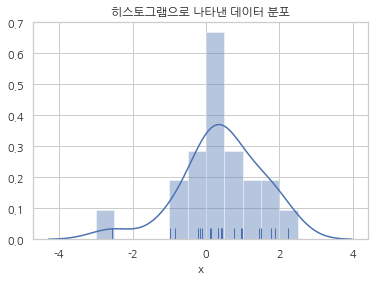

In [1]:
%matplotlib inline

# 히스토그램 그리기
np.random.seed(0)
x = np.random.normal(size = 21)
# print(x)

bins = np.linspace(-4, 4, 17)
# print(bins, len(bins))

'''sns은 seaborn 패키지에 대한 별칭임'''
# rug 옵션: 데이터의 위치를 나타내는 선분 표시, kde 옵션: 밀집도 그래프
# bins 매개변수 : 구간
sns.distplot(x, rug=True, kde=True, bins=bins)
plt.title("히스토그램으로 나타낸 데이터 분포")
plt.xlabel("x")
plt.show()

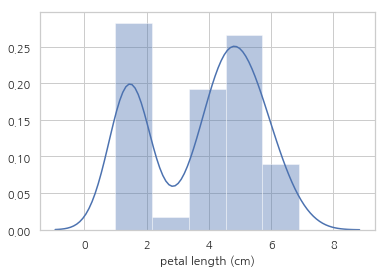

In [12]:
# iris 데이터셋의 "petal_length" 변수에 대한 히스토그램 그리기
from sklearn.datasets import load_iris

iris_dataset = load_iris()
iris_df = pd.DataFrame(iris_dataset["data"], columns=iris_dataset.feature_names)
# print(iris_df.columns)
sns.distplot(iris_df["petal length (cm)"])

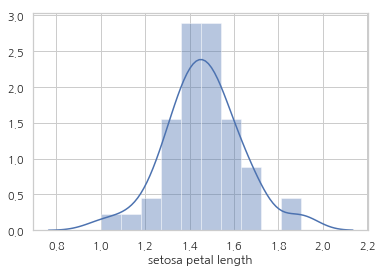

In [23]:
# iris 데이터셋의 종이 setosa인 데이터의 petal_length에 대한 히스토그램 그리기
iris_df["target"] = iris_dataset["target"]
df_setosa = iris_df[iris_df["target"] == 0]
sns.distplot(df_setosa["petal length (cm)"])
plt.xlabel("setosa petal length")
plt.show()

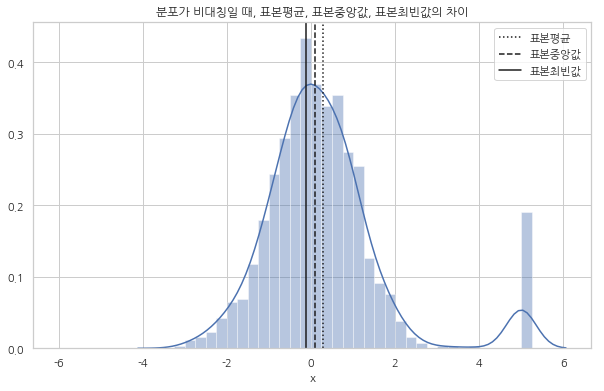

In [53]:
'''분포가 비대칭일 때, 표본평균,표본중앙값, 표본최빈값의 차이'''
np.random.seed(1)
x = np.random.normal(size = 1000)
x = np.hstack([x, 5 * np.ones(50)])
# print(x)

bins = np.linspace(-6, 6, 12*4 + 1)
# print(bins, len(bins))

ns, _ = np.histogram(x, bins = bins)
# print(ns, "\n")
# print(_)

sample_mean = np.mean(x)
sample_median = np.median(x)

# 'ns' 벡터 내 최대값 요소의 index
mode_index = np.argmax(ns)
sample_mode = 0.5 * (bins[mode_index] + bins[mode_index + 1])

plt.figure(figsize=(10,6))
sns.distplot(x, bins=bins)

# 'c' 매개변수 : verticle line의 color를 의미, "ls" 매개변수 : line style을 의미
plt.axvline(sample_mean, c = "k", ls=":", label = "표본평균")
plt.axvline(sample_median, c = "k", ls = "--", label = "표본중앙값")
plt.axvline(sample_mode, c = "k", ls = "-", label = "표본최빈값")
plt.title("분포가 비대칭일 때, 표본평균, 표본중앙값, 표본최빈값의 차이")
plt.legend()
plt.xlabel("x")
plt.show()

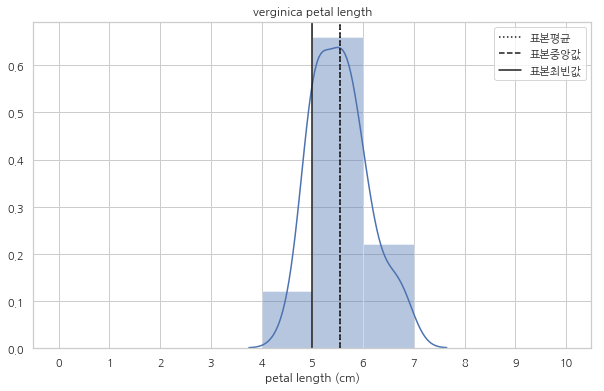

In [68]:
# iris 데이터셋의 종이 verginica인 데이터의 petal_length에 대한 히스토그램 그리기(bins = np.linspace(0, 10, 11))
iris_df["target"] = iris_dataset["target"]
df_verginica = iris_df[iris_df["target"] == 2]
bins = np.linspace(0, 10, 11)

verginica_petal_length = df_verginica["petal length (cm)"]
verginica_petal_length_mean = np.mean(verginica_petal_length)
verginica_petal_length_median = np.median(verginica_petal_length)
verginica_petal_length_mode_index = np.argmax(np.histogram(verginica_petal_length, bins=bins)[0])

plt.figure(figsize=(10, 6))
sns.distplot(df_verginica["petal length (cm)"], bins=bins)
plt.axvline(verginica_petal_length_mean, c = "k", ls = ":", label = "표본평균")
plt.axvline(verginica_petal_length_median, c = "k", ls = "--", label = "표본중앙값")
plt.axvline(verginica_petal_length_mode_index, c = "k", ls = "-", label = "표본최빈값")
plt.legend()
plt.title("verginica petal length")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.show()

# plt.xlabel("setosa petal length")
# plt.show()

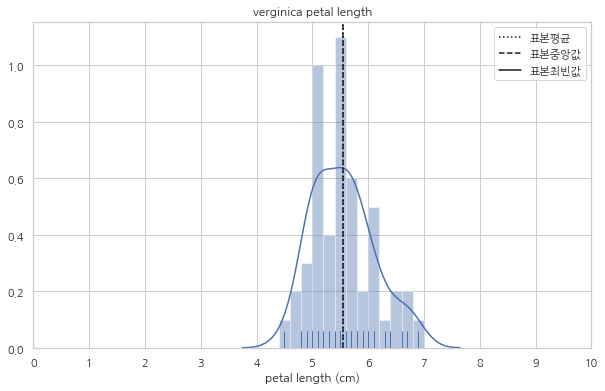

In [76]:
# iris 데이터셋의 종이 verginica인 데이터의 petal_length에 대한 히스토그램 그리기(bins = np.linspace(0, 10, 51))
iris_df["target"] = iris_dataset["target"]
df_verginica = iris_df[iris_df["target"] == 2]
bins = np.linspace(0, 10, 51)

verginica_petal_length = df_verginica["petal length (cm)"]
verginica_petal_length_mean = np.mean(verginica_petal_length)
verginica_petal_length_median = np.median(verginica_petal_length)
verginica_petal_length_mode_index = np.argmax(np.histogram(verginica_petal_length, bins=bins)[0])

plt.figure(figsize=(10, 6))
sns.distplot(df_verginica["petal length (cm)"], bins=bins, kde=True, rug=True)
plt.axvline(verginica_petal_length_mean, c = "k", ls = ":", label = "표본평균")
plt.axvline(verginica_petal_length_median, c = "k", ls = "--", label = "표본중앙값")
plt.axvline(verginica_petal_length_mode_index, c = "k", ls = "-", label = "표본최빈값")
plt.legend()
plt.title("verginica petal length")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.xlim(0, 10)
plt.show()


편향 표본분산 : 3.896937825248617
편향 표본표준편차 : 1.9740663173380515 

비편향 표본분산 : 3.900838663912529
비편향 표본표준편차 : 1.9750540913890255


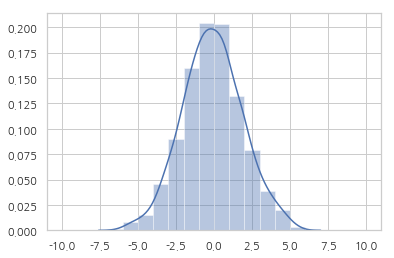

In [88]:
sp.random.seed(0)

# 표본평균이 0이고 표본표준편차가 2인 데이터 생성
x = sp.stats.norm(0, 2).rvs(1000)

print("편향 표본분산 :", np.var(x))
print("편향 표본표준편차 :", np.std(x), "\n")
print("비편향 표본분산 :", np.var(x, ddof=1))
print("비편향 표본표준편차 :", np.std(x, ddof=1))

sns.distplot(x, bins = np.linspace(-10, 10, 21))
plt.show()

In [89]:
# 표본 비대칭도와 표본 첨도
print("표본 비대칭도 :", sp.stats.skew(x))
print("표본 첨도 :", sp.stats.kurtosis(x))

표본 비대칭도 : 0.03385895323565712
표본 첨도 : -0.0467663244783294


In [26]:
'''
'_like'가 붙은 numpy method는 인자로 numpy.array를 받는다.
인자로 들어온 것의 shape에 지정된 값을 채운 numpy.array를 반환한다.
'''
a = np.array([[1,2],
             [3,4]])
result = np.zeros_like(a)

print(result)

[[0 0]
 [0 0]]


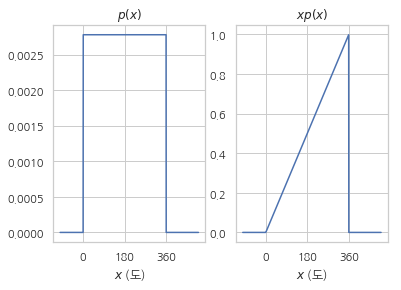

In [27]:
# 원반 각도에 대한 확률밀도함수와 연속확률변수의 기대값(두 번째 그래프의 면적)
x = np.linspace(-100, 500, 1000)
p = np.zeros_like(x)
p[(0 < x) & (x <= 360)] = 1/360
xp = x * p

plt.subplot(121)
plt.plot(x, p)n
plt.xticks([0, 180, 360])
plt.title("$p(x)$")
plt.xlabel("$x$ (도)")

plt.subplot(122)
plt.plot(x, xp)
plt.xticks([0, 180, 360])
plt.title("$xp(x)$")
plt.xlabel("$x$ (도)")
plt.show()

In [2]:
# 첫번째 numpy array 생성
first_numpy_int_array = np.random.randint(101, size=100)
# print(first_numpy_int_array)

# 두번째 numpy array 생성
second_numpy_int_array = np.random.randint(101, size=100)
# print(second_numpy_int_array)

# 생성한 두 numpy array를 더하기
sum_first_second_numpy_array = first_numpy_int_array + second_numpy_int_array
# print(sum_first_second_numpy_array)

# 두 numpy array를 더한 결과값의 표준편차 구하기
print(np.std(sum_first_second_numpy_array))

# 첫번째 numpy array의 표준편차와 두번째 numpy array의 표준편차를 더하기
print(np.std(first_numpy_int_array) + np.std(second_numpy_int_array))

42.7100678997353
59.34874555967852


In [4]:
'''결합확률질량함수 나타내기'''

# 두 과목에 대한 성적 분포 나타내기
grades = ['A', 'B', 'C', 'D', 'E', 'F']
scores = pd.DataFrame(
[[1,2,1,0,0,0],
[0,2,3,1,0,0,],
[0,4,7,4,1,0],
[0,1,4,5,4,0],
[0,0,1,3,2,0],
[0,0,0,1,2,1]], columns=grades, index=grades
)

scores.index.name = "Y"
scores.columns.name = "X"
display(scores)

X,A,B,C,D,E,F
Y,,,,,,
A,1,2,1,0,0,0
B,0,2,3,1,0,0
C,0,4,7,4,1,0
D,0,1,4,5,4,0
E,0,0,1,3,2,0
F,0,0,0,1,2,1


In [5]:
# 위 데이터프레임을 바탕으로, 확률변수 X와 Y의 결합확률질량함수 구하기
pmf = scores/scores.values.sum()
display(pmf)

X,A,B,C,D,E,F
Y,,,,,,
A,0.02,0.04,0.02,0.00,0.00,0.00
B,0.00,0.04,0.06,0.02,0.00,0.00
C,0.00,0.08,0.14,0.08,0.02,0.00
D,0.00,0.02,0.08,0.10,0.08,0.00
E,0.00,0.00,0.02,0.06,0.04,0.00
F,0.00,0.00,0.00,0.02,0.04,0.02


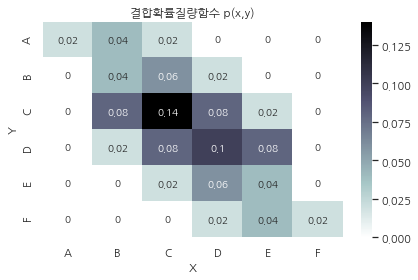

In [11]:
# 위 결합확률질량함수를 히트맵으로 나타내기
%matplotlib inline
sns.heatmap(pmf, cmap=mpl.cm.bone_r, annot=True, xticklabels=["A", 'B', 'C', 'D', 'E', 'F'], yticklabels=["A", 'B', 'C', 'D', 'E', 'F'])
plt.title("결합확률질량함수 p(x,y)")
plt.tight_layout()
plt.show()

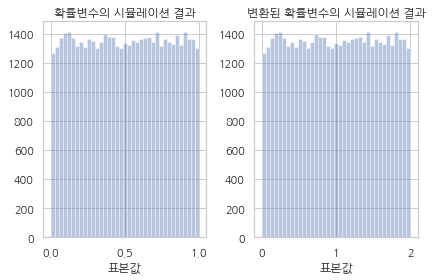

* 확률변수의 표본 분포 형태와 변환된 확률변수의 표본 분포 형태가 동일함


In [1]:
"""

- 확률변수의 변환 : 기존의 확률변수를 사용하여 새로운 확률변수를 만드는 것
                   즉, 기존의 확률변수를 특정 함수에 입력하여, 새로운 확률변수를 얻는 것

- 변환된 확률변수의 확률분포와 기존 확률변수의 확률분포는 서로 다를 수 있음

"""

# 균일분포를 띠는 확률변수에 대한 변환

%matplotlib inline

import scipy as sp
import scipy.stats
import matplotlib.pylab as plt

rv = sp.stats.uniform() # 균일분포를 띠는 확률변수

x1 = rv.rvs(size = 50000)
x2 = 2 * x1

plt.figure()

plt.subplot(121)
sns.distplot(x1, kde=False)
plt.xlabel("표본값")
plt.title("확률변수의 시뮬레이션 결과")

plt.subplot(122)
sns.distplot(x2, kde=False)
plt.xlabel("표본값")
plt.title("변환된 확률변수의 시뮬레이션 결과")

plt.tight_layout()
plt.show()

print("* 확률변수의 표본 분포 형태와 변환된 확률변수의 표본 분포 형태가 동일함")


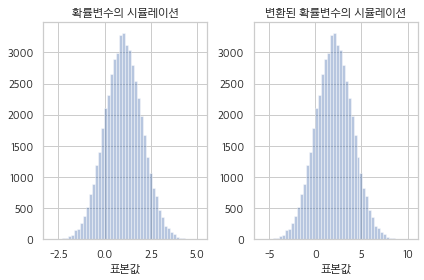

* 확률변수의 표본 분포 형태와 변환된 확률변수의 표본 분포 형태가 동일함


In [8]:
# 정규분포를 띠는 확률변수에 대한 변환

rv = sp.stats.norm(loc = 1) # 균일분포를 띠는 확률변수

x1 = rv.rvs(size = 50000)
x2 = 2 * x1

plt.figure()

plt.subplot(121)
sns.distplot(x1, kde=False)
plt.xlabel("표본값")
plt.title("확률변수의 시뮬레이션")

plt.subplot(122)
sns.distplot(x2, kde=False)
plt.xlabel("표본값")
plt.title("변환된 확률변수의 시뮬레이션")

plt.tight_layout()
plt.show()

print("* 확률변수의 표본 분포 형태와 변환된 확률변수의 표본 분포 형태가 동일함")


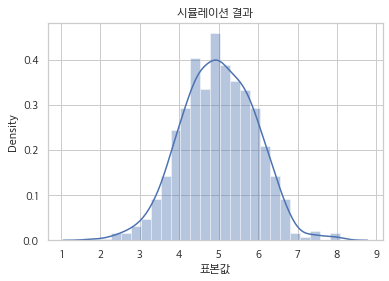

* '중심극한정리'에 의해 해당 시뮬레이션 결과가 생성됨


In [13]:
# 여러 확률변수를 합하여 생성된 확률변수의 시뮬레이션 결과 확인
# 한 개의 확률변수에서 여러 표본값을 생성하는 것은 해당 확률변수에 대한 복제본을 여러개 만들고, 
# 복제된 확률변수들이 표본값을 한개씩 생성하는 것을 의미함

rv = sp.stats.uniform()
X = []

for i in range(1000) :
    
    X.append((rv.rvs(10)).sum())

plt.figure()
sns.distplot(X)
plt.title('시뮬레이션 결과')
plt.xlabel("표본값")
plt.show()

print("* '중심극한정리'에 의해 해당 시뮬레이션 결과가 생성됨")